In [3]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

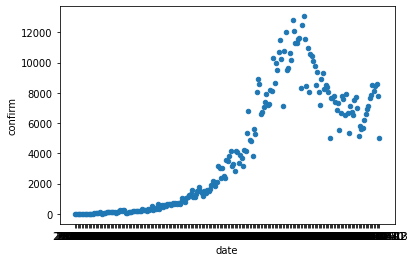

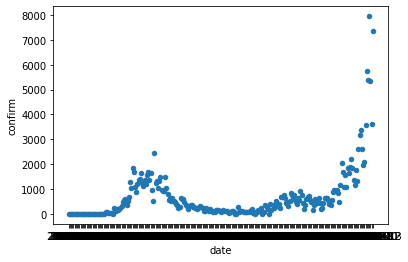

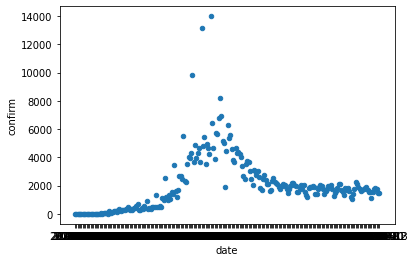

In [13]:
# df_region = pd.read_csv('region.csv')
df1_test_confirm = pd.read_csv('test/test1.csv')
# plt.subplot(131)
df1_test_confirm.plot(x = 'date', y = 'confirm',kind = "scatter")

df2_test_confirm = pd.read_csv('test/test2.csv')
# plt.subplot(132)
df2_test_confirm.plot(x = 'date', y = 'confirm',kind = "scatter")

df3_test_confirm = pd.read_csv('test/test3.csv')
# plt.subplot(133)
df3_test_confirm.plot(x = 'date', y = 'confirm',kind = "scatter")

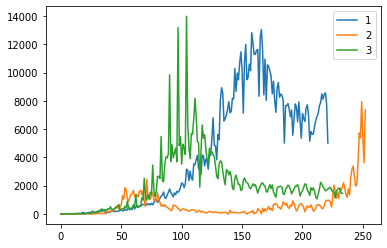

In [5]:

plt.plot(df1_test_confirm['confirm'].values,label='1')
plt.plot(df2_test_confirm['confirm'].values,label='2')
plt.plot(df3_test_confirm['confirm'].values,label='3')
plt.legend()
plt.savefig('confirm_poly.png')

## 特征工程

In [6]:
# 措施序列的分类分级特征构造
action_list = ['date','test','working_space','public','party','school','border','Home','tracking','flow','traffic']
df_action1 = pd.DataFrame(columns=action_list)
df_action2 = pd.DataFrame(columns=action_list)
df_action3 = pd.DataFrame(columns=action_list)

# 措施时间
df_action1['date'] = pd.date_range(start="20200306", end="20201013", freq="D")
df_action2['date'] = pd.date_range(start="20200204", end="20201013", freq="D")
df_action3['date'] = pd.date_range(start="20200223", end="20201013", freq="D")


df_action1 = df_action1.fillna(0)
df_action2 = df_action2.fillna(0)
df_action3 = df_action3.fillna(0)


def gen_action(df_action,month,day,kind,cate):# 设置措施的时序序列
    ind = df_action['date']>=pd.datetime(2020,month,day)
    df_action[kind][ind] = cate

# 区域1
gen_action(df_action1,1,31,'test',3)

gen_action(df_action1,2,24,'working_space',1)
gen_action(df_action1,4,14,'working_space',2)
gen_action(df_action1,4,27,'working_space',3)
gen_action(df_action1,5,6,'working_space',2)
gen_action(df_action1,7,14,'working_space',3)
gen_action(df_action1,8,6,'working_space',0)

gen_action(df_action1,3,12,'public',2)
gen_action(df_action1,3,17,'public',3)
gen_action(df_action1,8,6,'public',0)

gen_action(df_action1,3,12,'party',2)
gen_action(df_action1,3,17,'party',3)
gen_action(df_action1,8,6,'party',0)

gen_action(df_action1,3,16,'school',3)
gen_action(df_action1,8,6,'school',0)

gen_action(df_action1,3,23,'border',2)
gen_action(df_action1,3,25,'border',3)

gen_action(df_action1,3,25,'Home',3)
gen_action(df_action1,7,14,'Home',2)
gen_action(df_action1,8,6,'Home',0)

gen_action(df_action1,3,26,'tracking',2)
gen_action(df_action1,4,3,'tracking',3)

gen_action(df_action1,3,25,'flow',3)
gen_action(df_action1,8,6,'flow',0)

gen_action(df_action1,3,25,'traffic',3)
gen_action(df_action1,8,6,'traffic',0)

# 区域2
gen_action(df_action2,3,1,'test',2)
gen_action(df_action2,3,13,'working_space',1)
gen_action(df_action2,3,14,'working_space',2)
gen_action(df_action2,3,18,'working_space',3)
gen_action(df_action2,5,11,'working_space',2)
# gen_action(df_action2,7,29,'working_space',2)
gen_action(df_action2,8,9,'working_space',0)

gen_action(df_action2,3,10,'public',1)
gen_action(df_action2,3,14,'public',3)
gen_action(df_action2,8,9,'public',0)

gen_action(df_action2,3,18,'party',3)
gen_action(df_action2,6,8,'party',2)
gen_action(df_action2,7,29,'party',3)
gen_action(df_action2,8,9,'party',0)

gen_action(df_action2,3,14,'school',2)
gen_action(df_action2,6,5,'school',1)
# gen_action(df_action2,7,1,'school',1)
gen_action(df_action2,8,9,'school',0)

gen_action(df_action2,3,20,'border',3)
gen_action(df_action2,5,5,'border',2)

gen_action(df_action2,3,18,'Home',3)
gen_action(df_action2,6,8,'Home',0)
gen_action(df_action2,7,29,'Home',2)
gen_action(df_action2,8,7,'Home',1)
gen_action(df_action2,8,9,'Home',0)

gen_action(df_action2,2,26,'tracking',3)
gen_action(df_action2,3,13,'tracking',2)
gen_action(df_action2,5,18,'tracking',3)

gen_action(df_action2,3,14,'flow',3)
gen_action(df_action2,6,8,'flow',0)
gen_action(df_action2,7,28,'flow',1)
gen_action(df_action2,8,9,'flow',2)
gen_action(df_action2,8,10,'flow',0)

# 区域3
gen_action(df_action3,3,26,'test',3)

gen_action(df_action3,3,16,'working_space',3)
gen_action(df_action3,3,21,'working_space',2)
gen_action(df_action3,8,10,'working_space',0)

gen_action(df_action3,3,16,'public',2)
gen_action(df_action3,3,25,'public',3)
gen_action(df_action3,8,10,'public',0)

gen_action(df_action3,3,16,'party',2)
gen_action(df_action3,3,25,'party',3)
gen_action(df_action3,5,15,'party',2)
gen_action(df_action3,8,10,'party',0)

gen_action(df_action3,3,15,'school',3)
gen_action(df_action3,8,10,'school',0)
# gen_action(df_action3,8,9,'school',0)

gen_action(df_action3,3,18,'border',2)
gen_action(df_action3,8,1,'border',3)

gen_action(df_action3,3,25,'Home',2)
gen_action(df_action3,5,15,'Home',3)
gen_action(df_action3,8,10,'Home',0)

gen_action(df_action3,3,30,'tracking',3)

gen_action(df_action3,3,25,'flow',2)
gen_action(df_action3,5,8,'flow',3)
gen_action(df_action3,5,15,'flow',2)
gen_action(df_action3,8,10,'flow',0)

gen_action(df_action3,7,3,'traffic',3)
gen_action(df_action3,7,17,'traffic',2)
gen_action(df_action3,8,10,'traffic',0)



In [7]:

# day特征的处理
df1_date = pd.DataFrame(columns=['date','DayCount','Month','Day'])
df2_date = pd.DataFrame(columns=['date','DayCount','Month','Day'])
df3_date = pd.DataFrame(columns=['date','DayCount','Month','Day'])
df1_date['date'] = pd.date_range(start="20200306", end="20201013", freq="D")
df2_date['date'] = pd.date_range(start="20200204", end="20201013", freq="D")
df3_date['date'] = pd.date_range(start="20200223", end="20201013", freq="D")

# 前14天的历史确诊数据
lag = 14
df1_lag = df1_test_confirm.copy()
df2_lag = df2_test_confirm.copy()
df3_lag = df3_test_confirm.copy()
for i in range(1,lag+1):
    k = str(i)
    df1_lag['confirm_lag_'+k] = df1_lag['confirm'].shift(i)
    df2_lag['confirm_lag_'+k] = df2_lag['confirm'].shift(i)
    df3_lag['confirm_lag_'+k] = df3_lag['confirm'].shift(i)
df1_lag = df1_lag.fillna(0)
df2_lag = df2_lag.fillna(0)
df3_lag = df3_lag.fillna(0)


In [8]:

# 训练数据
X1_train = np.c_[df1_date[['DayCount','Month','Day']],df_action1[['test', 'working_space', 'public', 'party', 'school', 'border','Home', 'tracking', 'flow', 'traffic']],df1_lag[['confirm_lag_1', 'confirm_lag_2', 'confirm_lag_3',
       'confirm_lag_4', 'confirm_lag_5', 'confirm_lag_6', 'confirm_lag_7',
       'confirm_lag_8', 'confirm_lag_9', 'confirm_lag_10', 'confirm_lag_11',
       'confirm_lag_12', 'confirm_lag_13', 'confirm_lag_14']]]
X2_train = np.c_[df2_date[['DayCount','Month','Day']],df_action2[['test', 'working_space', 'public', 'party', 'school', 'border','Home', 'tracking', 'flow', 'traffic']],df2_lag[['confirm_lag_1', 'confirm_lag_2', 'confirm_lag_3',
       'confirm_lag_4', 'confirm_lag_5', 'confirm_lag_6', 'confirm_lag_7',
       'confirm_lag_8', 'confirm_lag_9', 'confirm_lag_10', 'confirm_lag_11',
       'confirm_lag_12', 'confirm_lag_13', 'confirm_lag_14']]]
X3_train = np.c_[df3_date[['DayCount','Month','Day']],df_action3[['test', 'working_space', 'public', 'party', 'school', 'border','Home', 'tracking', 'flow', 'traffic']],df3_lag[['confirm_lag_1', 'confirm_lag_2', 'confirm_lag_3',
       'confirm_lag_4', 'confirm_lag_5', 'confirm_lag_6', 'confirm_lag_7',
       'confirm_lag_8', 'confirm_lag_9', 'confirm_lag_10', 'confirm_lag_11',
       'confirm_lag_12', 'confirm_lag_13', 'confirm_lag_14']]]


# 预测值
Y1 = df1_test_confirm['confirm'].values
Y2 = df2_test_confirm['confirm'].values
Y3 = df3_test_confirm['confirm'].values

## 模型

In [9]:
from xgboost import XGBRegressor
def xgb_fit_data(X_train,Y_train):
    rf = XGBRegressor(n_estimators = 2500 , random_state = 0 , max_depth = 27)
    rf.fit(X_train,Y_train)
    res = []
    hide = X_train.copy()
    start = hide[-1].copy()
    for i in range(7):
        newlag = rf.predict(start.reshape(1,-1))[0]
        res.append(int(newlag))
        start[0]+=1
        start[2]+=1
        start[14:] = start[13:-1]
        start[13] = newlag
    return res

In [10]:
res1 = xgb_fit_data(X1_train,Y1)
res2 = xgb_fit_data(X2_train,Y2)
res3 = xgb_fit_data(X3_train,Y3)

In [11]:
submit1 = pd.DataFrame(data = {"date":pd.date_range(start="20201014", end="20201020", freq="D"),'confirm':res1})
submit2 = pd.DataFrame(data = {"date":pd.date_range(start="20201014", end="20201020", freq="D"),'confirm':res2})
submit3 = pd.DataFrame(data = {"date":pd.date_range(start="20201014", end="20201020", freq="D"),'confirm':res3})

In [12]:
submit1.to_csv('result1.csv',index=None)
submit2.to_csv('result2.csv',index=None)
submit3.to_csv('result3.csv',index=None)